In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from config.load_configuration import load_configuration
config = load_configuration()

folders = [f for f in os.listdir(config['path_to_split_aug_pics']) if os.path.isdir(os.path.join(config['path_to_split_aug_pics'], f))]
print(folders)

PC Name: DESKTOP-LUKAS
Loaded configuration from ../config/config_lukas.yaml
['test', 'train', 'val']


In [3]:
folder_files = {}
for folder in folders:
    folder_path = os.path.join(config['path_to_split_aug_pics'], folder)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    folder_files[folder] = files

print(folder_files)

{'test': ['Eichhoernchen_0005_nok_v0.jpg', 'Eichhoernchen_0005_nok_v1.jpg', 'Eichhoernchen_0005_nok_v2.jpg', 'Eichhoernchen_0005_nok_v3.jpg', 'Eichhoernchen_0005_nok_v4.jpg', 'Eichhoernchen_0005_nok_v5.jpg', 'Eichhoernchen_0013_nok_v0.jpg', 'Eichhoernchen_0013_nok_v1.jpg', 'Eichhoernchen_0013_nok_v2.jpg', 'Eichhoernchen_0013_nok_v3.jpg', 'Eichhoernchen_0013_nok_v4.jpg', 'Eichhoernchen_0013_nok_v5.jpg', 'Eichhoernchen_0034_nok_v0.jpg', 'Eichhoernchen_0034_nok_v1.jpg', 'Eichhoernchen_0034_nok_v2.jpg', 'Eichhoernchen_0034_nok_v3.jpg', 'Eichhoernchen_0034_nok_v4.jpg', 'Eichhoernchen_0034_nok_v5.jpg', 'Eichhoernchen_0043_nok_v0.jpg', 'Eichhoernchen_0043_nok_v1.jpg', 'Eichhoernchen_0043_nok_v2.jpg', 'Eichhoernchen_0043_nok_v3.jpg', 'Eichhoernchen_0043_nok_v4.jpg', 'Eichhoernchen_0043_nok_v5.jpg', 'Eichhoernchen_0060_nok_v0.jpg', 'Eichhoernchen_0060_nok_v1.jpg', 'Eichhoernchen_0060_nok_v2.jpg', 'Eichhoernchen_0060_nok_v3.jpg', 'Eichhoernchen_0060_nok_v4.jpg', 'Eichhoernchen_0060_nok_v5.jpg', 

In [4]:
from collections import Counter

animal_counts = {}
for split in ['train', 'val', 'test']:
    files = folder_files[split]
    # Extract animal name from filename (assumes format: Animal_xxx.jpg)
    animal_names = [f.split('_')[0] for f in files]
    animal_counts[split] = dict(Counter(animal_names))

print(animal_counts)

{'train': {'Eichhoernchen': 956, 'Frettchen': 618, 'Hamster': 678, 'Hase': 1810, 'Hund': 502, 'Igel': 714, 'Kaninchen': 8718, 'Katze': 458, 'Marder': 528, 'Maus': 246, 'Meerschweinchen': 540, 'Ratte': 364, 'Schlange': 452, 'Siebenschlaefer': 284, 'Waschbaer': 532}, 'val': {'Eichhoernchen': 126, 'Frettchen': 84, 'Hamster': 210, 'Hase': 404, 'Hund': 122, 'Igel': 196, 'Kaninchen': 1870, 'Katze': 138, 'Marder': 126, 'Maus': 54, 'Meerschweinchen': 126, 'Ratte': 82, 'Schlange': 48, 'Siebenschlaefer': 54, 'Waschbaer': 90}, 'test': {'Eichhoernchen': 178, 'Frettchen': 84, 'Hamster': 174, 'Hase': 366, 'Hund': 136, 'Igel': 84, 'Kaninchen': 1874, 'Katze': 158, 'Marder': 120, 'Maus': 18, 'Meerschweinchen': 84, 'Ratte': 120, 'Schlange': 152, 'Siebenschlaefer': 78, 'Waschbaer': 96}}


C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\2248757960.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(counts.keys(), rotation=90)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\2248757960.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(counts.keys(), rotation=90)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\2248757960.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(counts.keys(), rotation=90)


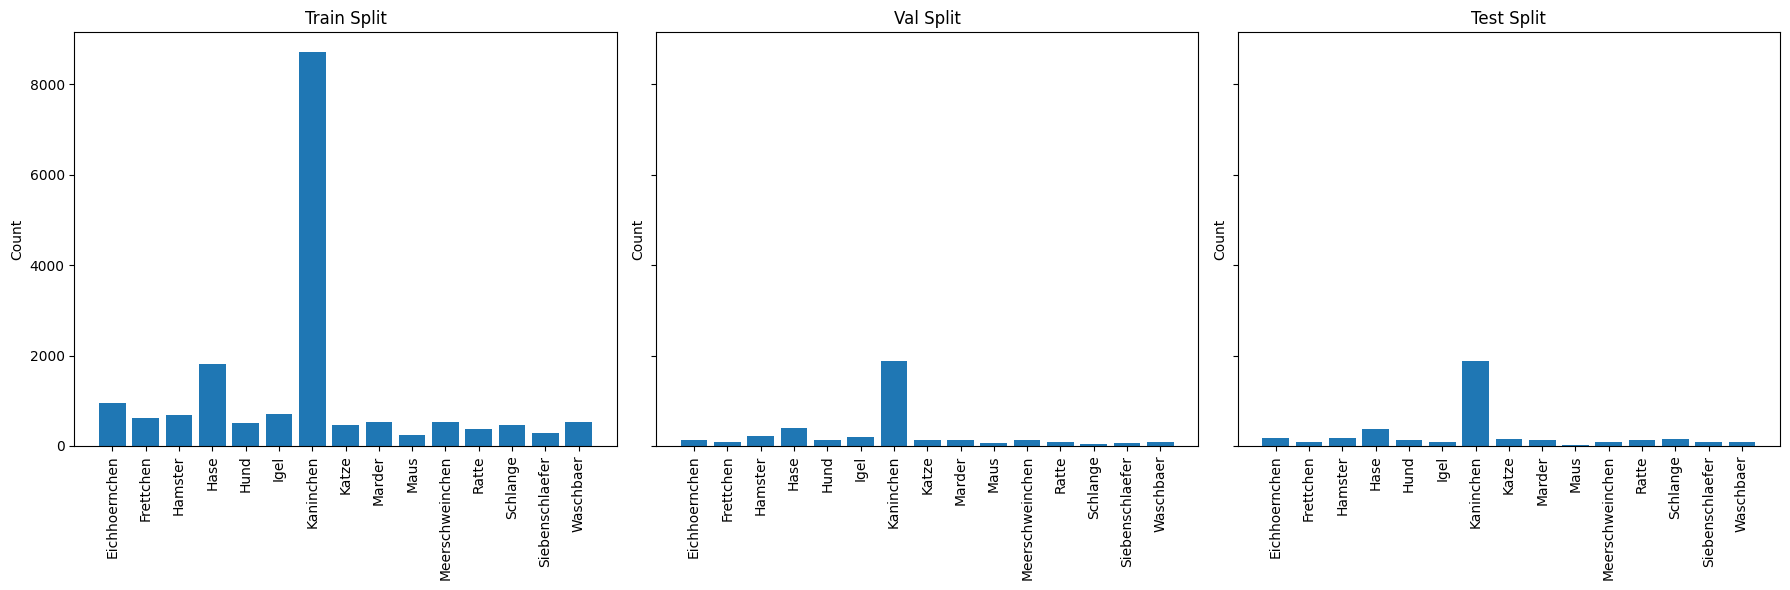

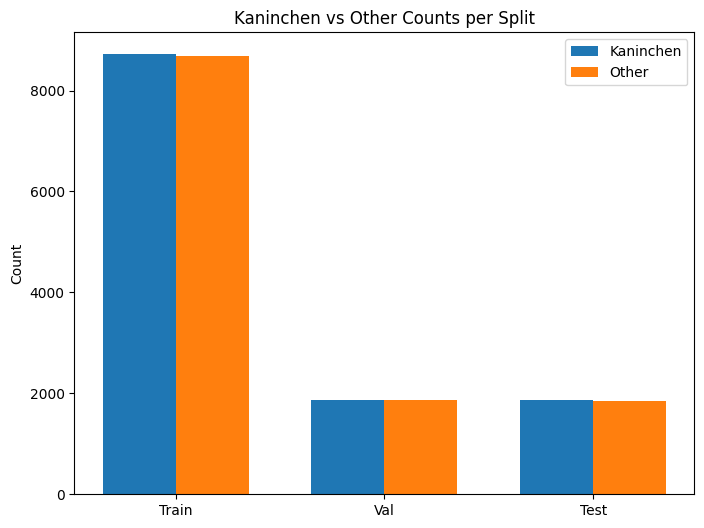

In [7]:
import matplotlib.pyplot as plt

splits = ['train', 'val', 'test']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, split in enumerate(splits):
    counts = animal_counts[split]
    axes[idx].bar(counts.keys(), counts.values())
    axes[idx].set_title(f"{split.capitalize()} Split")
    axes[idx].set_xticklabels(counts.keys(), rotation=90)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Prepare data for bar plot: one bar for 'Kaninchen', one for 'Other' per split
kaninchen_counts = []
other_counts = []

for split in splits:
    counts = animal_counts[split]
    kaninchen = counts.get('Kaninchen', 0)
    other = sum(v for k, v in counts.items() if k != 'Kaninchen')
    kaninchen_counts.append(kaninchen)
    other_counts.append(other)

x = range(len(splits))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([i - width/2 for i in x], kaninchen_counts, width, label='Kaninchen')
ax.bar([i + width/2 for i in x], other_counts, width, label='Other')

ax.set_xticks(x)
ax.set_xticklabels([s.capitalize() for s in splits])
ax.set_ylabel('Count')
ax.set_title("Kaninchen vs Other Counts per Split")
ax.legend()
plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\891831558.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(normalized_counts.keys(), rotation=90)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\891831558.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(normalized_counts.keys(), rotation=90)
C:\Users\lukas\AppData\Local\Temp\ipykernel_10152\891831558.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(normalized_counts.keys(), rotation=90)


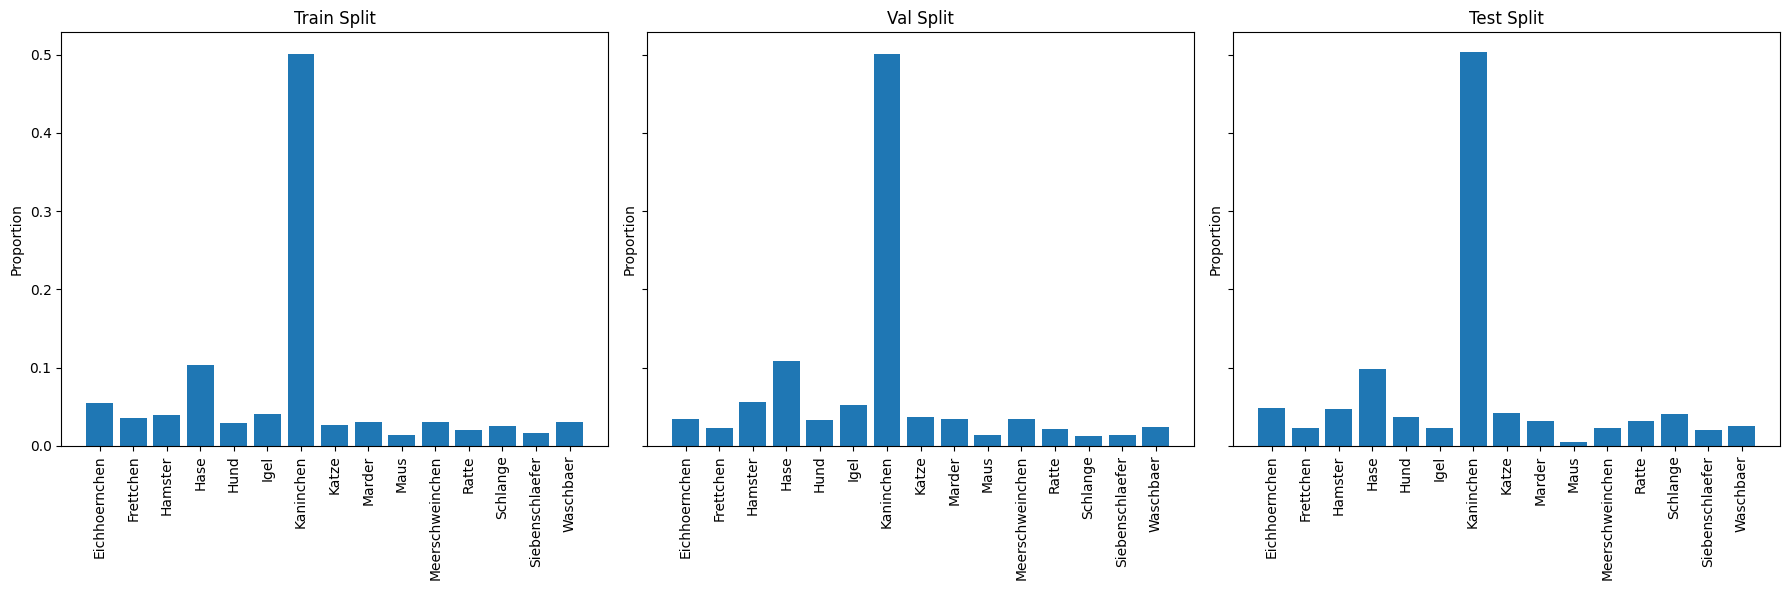

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, split in enumerate(splits):
    counts = animal_counts[split]
    total = sum(counts.values())
    normalized_counts = {k: v / total for k, v in counts.items()}
    axes[idx].bar(normalized_counts.keys(), normalized_counts.values())
    axes[idx].set_title(f"{split.capitalize()} Split")
    axes[idx].set_xticklabels(normalized_counts.keys(), rotation=90)
    axes[idx].set_ylabel('Proportion')

plt.tight_layout()
plt.show()
